In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('plant.csv')

In [ ]:
df

,Pesticide_Amount_mg_per_ha,Plant_Production
0,0,10
1,50,15
2,100,18
3,150,20
4,200,21
5,250,20
6,300,18
7,350,15
8,400,10
9,450,4


Text(0, 0.5, 'Plant Production')

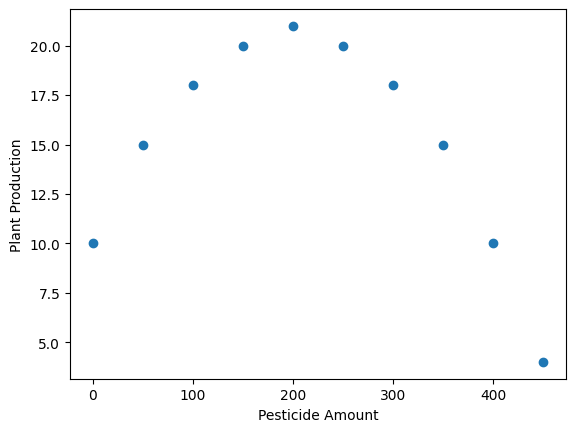

In [ ]:
plt.scatter(df['Pesticide_Amount_mg_per_ha'], df['Plant_Production'])
plt.xlabel('Pesticide Amount')
plt.ylabel('Plant Production')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
function = PolynomialFeatures(degree=2)
pesticide = function.fit_transform(df[['Pesticide_Amount_mg_per_ha']])

In [ ]:
pesticide

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 1.000e+02, 1.000e+04],
       [1.000e+00, 1.500e+02, 2.250e+04],
       [1.000e+00, 2.000e+02, 4.000e+04],
       [1.000e+00, 2.500e+02, 6.250e+04],
       [1.000e+00, 3.000e+02, 9.000e+04],
       [1.000e+00, 3.500e+02, 1.225e+05],
       [1.000e+00, 4.000e+02, 1.600e+05],
       [1.000e+00, 4.500e+02, 2.025e+05]])

In [ ]:
model = LinearRegression()
model.fit(pesticide, df['Plant_Production'])

LinearRegression()

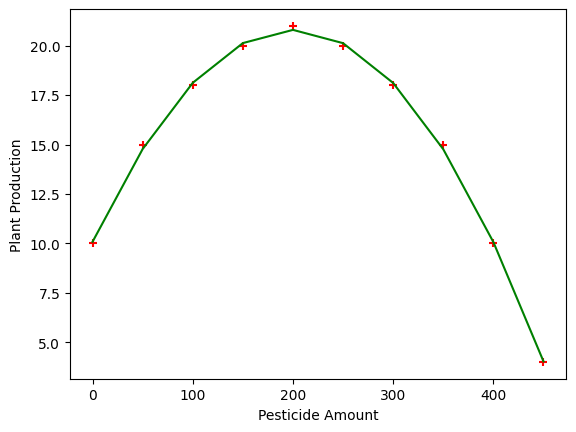

In [ ]:
plt.xlabel("Pesticide Amount")
plt.ylabel("Plant Production")
plt.scatter(df['Pesticide_Amount_mg_per_ha'], df['Plant_Production'], color='red', marker='+')
plt.plot(df['Pesticide_Amount_mg_per_ha'], model.predict(pesticide), color='green')

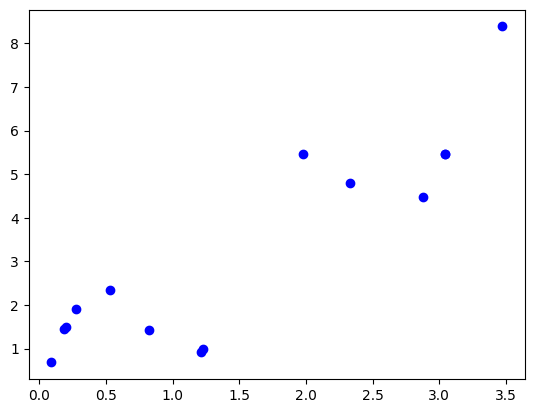

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# ==========================================
# 1. LOAD TRAINING DATA (Historical Campaigns)
# ==========================================
X = [[0.09], [0.19], [0.20], [0.28], [0.53], [0.82], [1.21],
           [1.23], [1.98], [2.33], [2.88], [3.04], [3.04], [3.47]]
y = [0.68, 1.44, 1.50, 1.90, 2.34, 1.42, 0.93,
           1.00, 5.46, 4.80, 4.48, 5.46, 5.47, 8.39]

# Visualise raw training data
plt.scatter(X, y, color='blue')
plt.show()

# ==========================================
# 2. TRAIN MODELS
# ==========================================

# --- Model A: Complex Polynomial (The Trap) ---


Poly Train Accuracy: 0.999999300516099


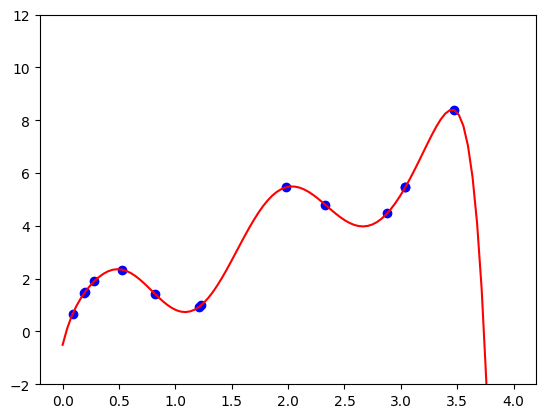

In [ ]:
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# --- Model B: Simple Linear (The Baseline) ---


# ==========================================
# 3. VISUALISE THE "PERFECT FIT"
# ==========================================
# We generate smooth points to see the "wiggle" between the training dots
X_plot = np.linspace(0, 4, 100).reshape(-1, 1)

plt.scatter(X, y, color='blue')
plt.plot(X_plot, model_poly.predict(poly.transform(X_plot)), color='red')
plt.ylim(-2, 12)
# Print Training Accuracy
print("Poly Train Accuracy:",  r2_score(y, model_poly.predict(X_poly)))


In [ ]:
model_linear = LinearRegression()
model_linear.fit(X, y)

LinearRegression()

Linear Train Accuracy: 0.7960733665213384


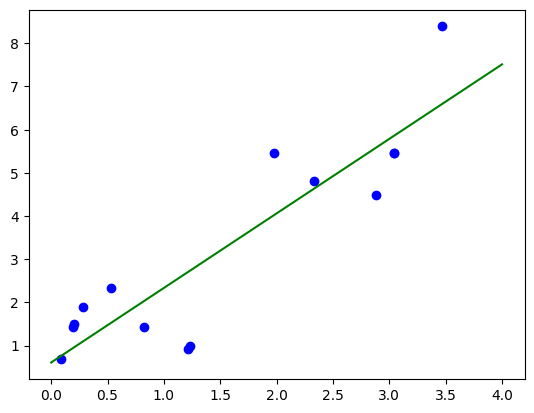

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X_plot, model_linear.predict(X_plot), color='green')

print(f"Linear Train Accuracy:", r2_score(y, model_linear.predict(X)))

In [ ]:
X_test = [[0.71], [1.16], [1.54], [2.66], [3.45], [3.88]]
y_test = [1.86, 0.82, 2.87, 3.91, 8.33, 8.03]

print("\n--- TESTING RESULTS ---")
# Poly Test
X_test_poly = poly.transform(X_test)
print("Poly Test Accuracy:",  r2_score(y_test, model_poly.predict(X_test_poly)))


--- TESTING RESULTS ---
Poly Test Accuracy: -15.602379450887852


In [ ]:
# Linear Test
print("Linear Test Accuracy:", r2_score(y_test, model_linear.predict(X_test)))

Linear Test Accuracy: 0.8279355590284452


In [ ]:
# Overfitting
# When you make your model too complex, it fails to capture the general pattern in the data
# it gives good training accuracy but fails in testing.

#Logistic Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('student_exam_simple.csv')

In [ ]:
df

,Hours_Studied,Passed_Exam
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [ ]:
model = LogisticRegression()
model.fit(df[['Hours_Studied']], df['Passed_Exam'])

LogisticRegression()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


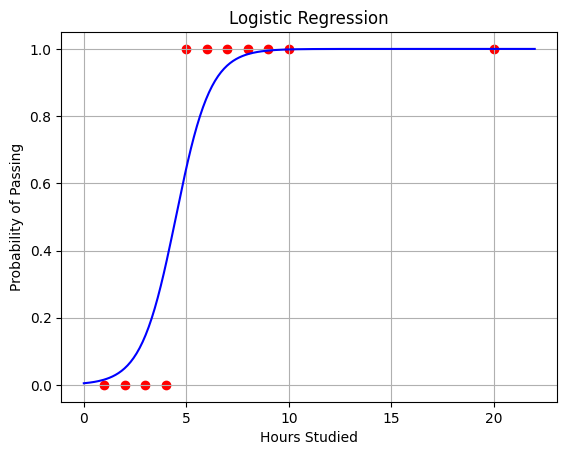

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_plot = np.linspace(0, 22, 300).reshape(-1,1)
y_pred = model.predict_proba(X_plot)[:, 1]

plt.scatter(df['Hours_Studied'], df['Passed_Exam'], color='red')
plt.plot(X_plot, y_pred, color='blue')

plt.title('Logistic Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.grid(True)

In [ ]:
model.predict([[10]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
model.predict_proba([[10]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.00149572, 0.99850428]])

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train

,id,Input_A,Input_B,Target
0,0,-1.107048,13211.546898,1
1,1,-1.502288,197302.006169,1
2,2,-0.452942,-188985.312052,0
3,3,-0.832504,43162.085636,1
4,4,1.237355,-133618.041882,0
...,...,...,...,...
1235,1235,-2.214566,186738.199920,1
1236,1236,1.230224,135920.914254,1
1237,1237,-0.864834,-46257.984590,0
1238,1238,-2.393653,-173596.062344,1


In [ ]:
test

,id,Input_A,Input_B
0,0,2.424206,2964.775487
1,1,-1.902029,76974.460530
2,2,-2.129777,56788.600177
3,3,2.223071,-52287.691914
4,4,0.659186,-20555.747618
...,...,...,...
295,295,-0.885218,-125921.772853
296,296,1.662213,182209.478382
297,297,1.031211,-697.727095
298,298,-1.574335,131007.568843


In [ ]:
X_train = train[['Input_A','Input_B']]
y_train = train['Target']

In [ ]:
X_test = test[['Input_A','Input_B']]

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
submissions = pd.DataFrame({
    'id': test['id'],
    'Target': predictions
})

submissions.to_csv('submission.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')